In [1]:
import pickle
import matplotlib.pyplot as plt
import networkx as nx


In [2]:
def load_and_analyze_pickle(pickle_path):
    # 加载pickle文件
    with open(pickle_path, 'rb') as f:
        data = pickle.load(f)
    
    print("✅ 成功加载数据")
    print(f"📦 总节点数: {len(data)}")

    # 打印前5个节点及其邻居
    print("\n🧾 前5个节点及其邻居：")
    for i, (node, neighbors) in enumerate(data.items()):
        print(f"{node} -> {neighbors}")
        if i >= 4:
            break

    return data


In [3]:
def visualize_graph(data, title="Graph Visualization"):
    G = nx.Graph()

    for node, neighbors in data.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = {node: (node[1], -node[0]) for node in G.nodes}  # (x, y) = (col, -row) for top-down view

    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, node_size=10, edge_color='gray', with_labels=False)
    plt.title(title)
    plt.axis('equal')
    plt.show()


✅ 成功加载数据
📦 总节点数: 2379

🧾 前5个节点及其邻居：
(454, 454) -> [(436, 454)]
(422, 897) -> [(402, 895)]
(1100, 1675) -> [(1106, 1656), (1096, 1696)]
(1178, 1741) -> [(1174, 1763), (1187, 1722)]
(610, 411) -> [(589, 410), (632, 414)]


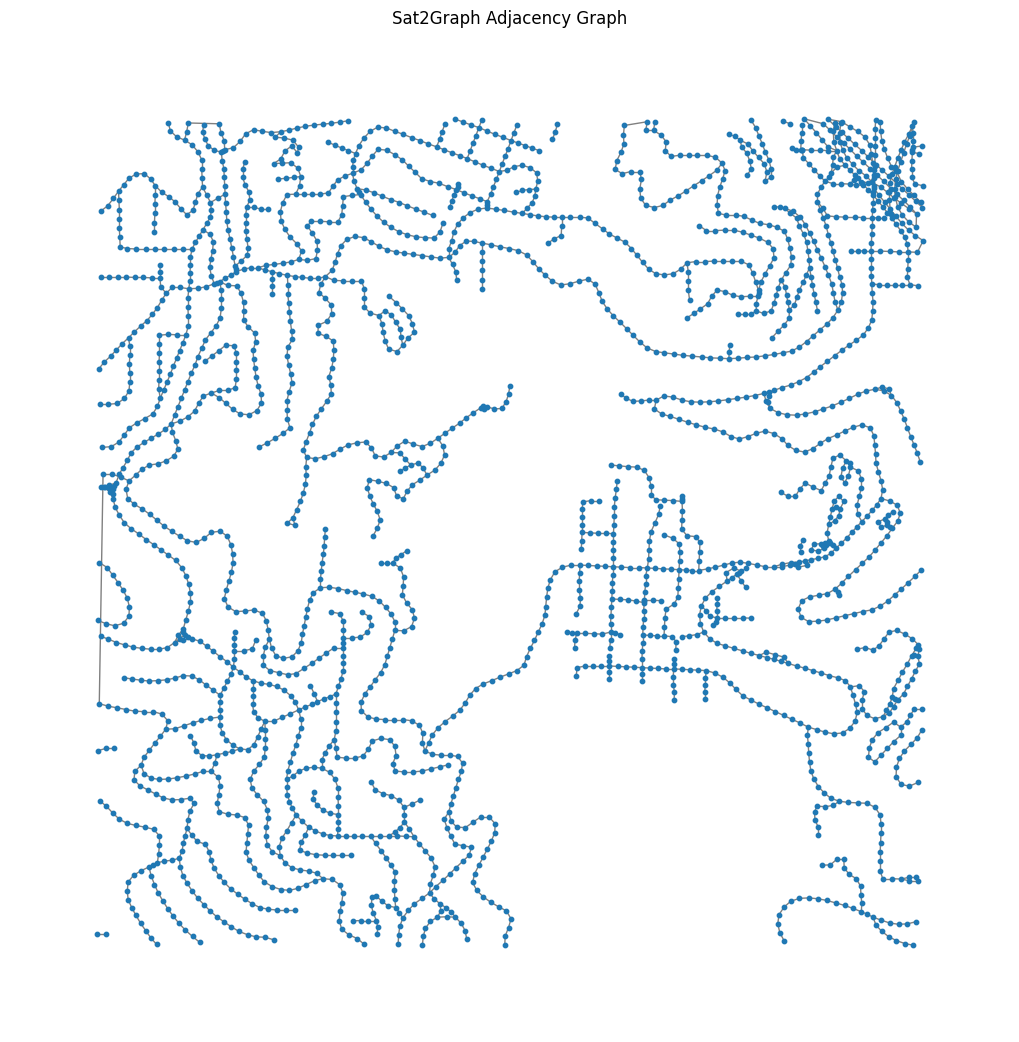

In [4]:
# ============ 用法示例 ============

# 请替换为你的 .p 文件路径
pickle_file_path = '../cityscale/20cities/region_0_refine_gt_graph.p'

# pickle_file_path = '../xian/xian_2019_400/region_0_refine_gt_graph.p'

graph_data = load_and_analyze_pickle(pickle_file_path)
visualize_graph(graph_data, title="Sat2Graph Adjacency Graph")


✅ 成功加载数据
📦 总节点数: 2379

🧾 前5个节点及其邻居：
(454, 454) -> [(436, 454)]
(422, 897) -> [(402, 895)]
(1100, 1675) -> [(1106, 1656), (1096, 1696)]
(1178, 1741) -> [(1174, 1763), (1187, 1722)]
(610, 411) -> [(589, 410), (632, 414)]


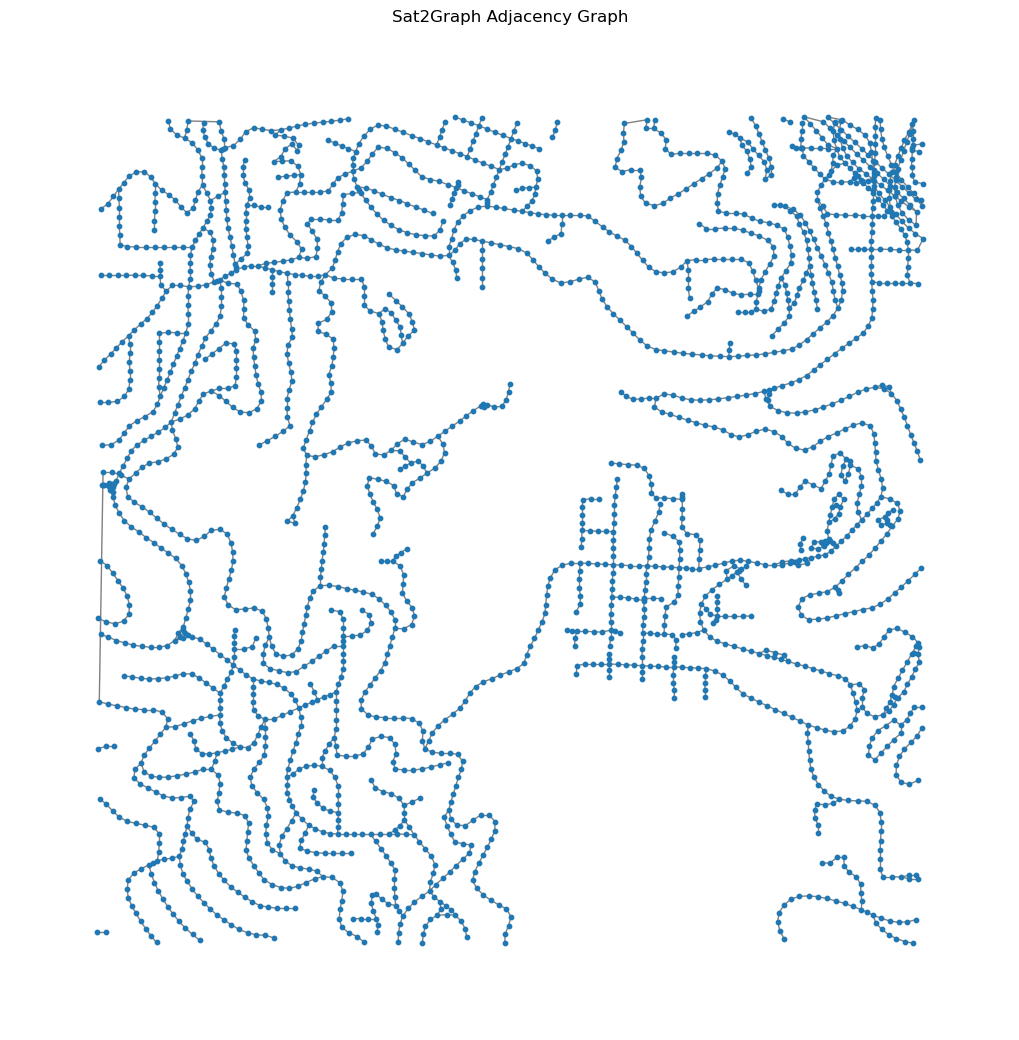

In [8]:
# ============ 用法示例 ============

# 请替换为你的 .p 文件路径
pickle_file_path = '../cityscale/20cities/region_0_graph_gt.pickle'

graph_data = load_and_analyze_pickle(pickle_file_path)
visualize_graph(graph_data, title="Sat2Graph Adjacency Graph")


✅ 成功加载数据
📦 总节点数: 10

🧾 前5个节点及其邻居：
(365, 152) -> [(352, 152), (362, 236), (365, 50), (400, 151)]
(352, 152) -> [(365, 152)]
(362, 236) -> [(363, 323), (366, 236), (365, 152)]
(400, 151) -> [(365, 152)]
(363, 323) -> [(362, 236), (362, 399), (400, 322)]


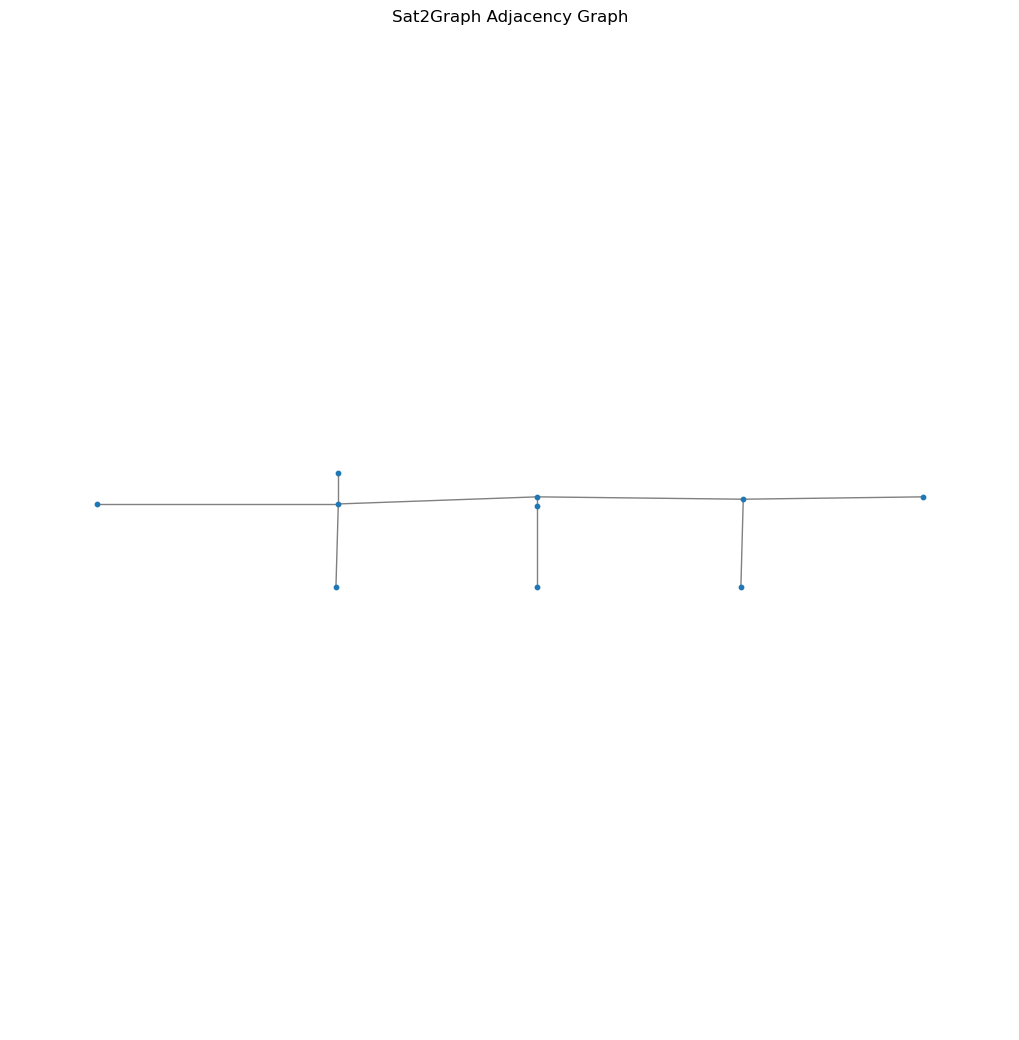

In [10]:
# ============ 用法示例 ============

# 请替换为你的 .p 文件路径
pickle_file_path = '../spacenet/RGB_1.0_meter/AOI_2_Vegas_1__gt_graph.p'

graph_data = load_and_analyze_pickle(pickle_file_path)
visualize_graph(graph_data, title="Sat2Graph Adjacency Graph")


✅ 成功加载数据
📦 总节点数: 23

🧾 前5个节点及其邻居：
(363, 380) -> [(363, 361), (362, 399)]
(363, 323) -> [(363, 301), (382, 323), (363, 342)]
(364, 152) -> [(358, 152), (364, 173), (364, 132), (382, 151)]
(364, 50) -> [(364, 70)]
(351, 152) -> [(358, 152)]


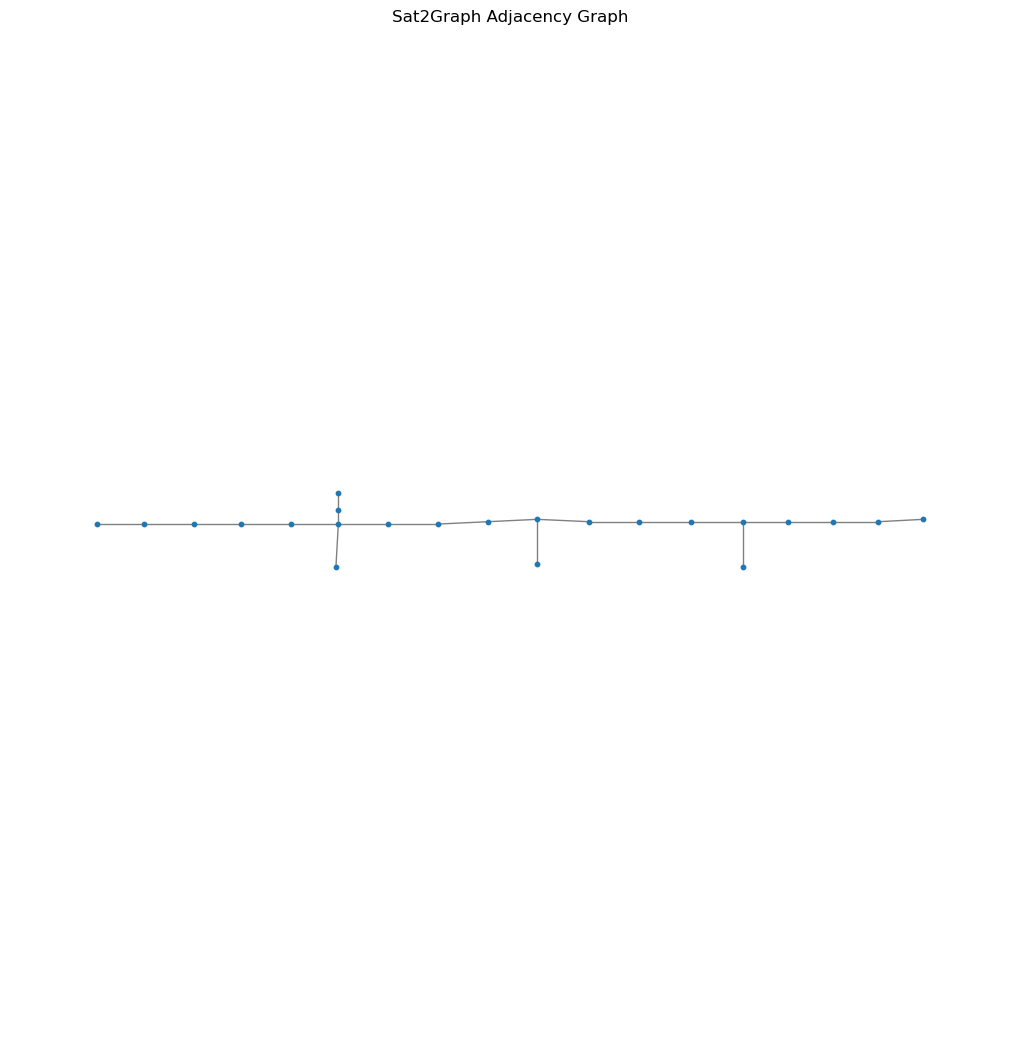

In [11]:
# ============ 用法示例 ============

# 请替换为你的 .p 文件路径
pickle_file_path = '../spacenet/RGB_1.0_meter/AOI_2_Vegas_1__gt_graph_dense.p'

graph_data = load_and_analyze_pickle(pickle_file_path)
visualize_graph(graph_data, title="Sat2Graph Adjacency Graph")


✅ 成功加载数据
📦 总节点数: 3191

🧾 前5个节点及其邻居：
(1930, 1134) -> [(1929, 1105), (1952, 1133), (1913, 1136), (1932, 1161)]
(148, 1966) -> [(130, 1967), (147, 1982), (164, 1969)]
(257, 508) -> [(273, 509), (256, 524), (254, 489), (238, 511)]
(1357, 1235) -> [(1353, 1264), (1340, 1233), (1353, 1215)]
(900, 1633) -> [(919, 1636), (900, 1612), (900, 1654)]


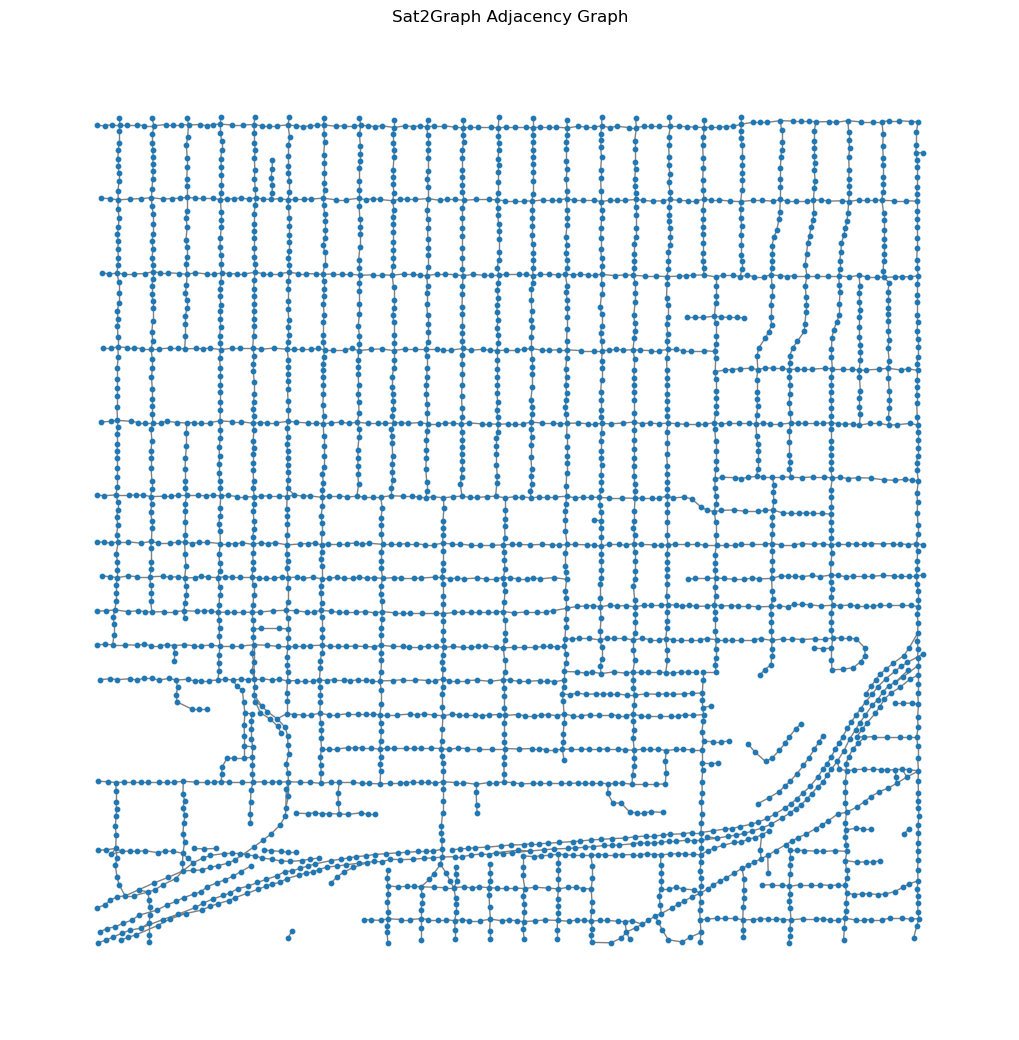

In [9]:
# ============ 用法示例 ============

# 请替换为你的 .p 文件路径
pickle_file_path = '../save/infer__20250402_114358/graph/8.p'

graph_data = load_and_analyze_pickle(pickle_file_path)
visualize_graph(graph_data, title="Sat2Graph Adjacency Graph")


In [14]:
import json

def save_graph_to_json(data, json_path, key_format="list"):
    """
    将邻接表字典保存为 JSON 文件。
    参数：
        data: dict[(int, int)] -> list[(int, int)]
        json_path: 保存路径
        key_format: 'list' 或 'str'，控制 dict 的 key 格式
    """
    if key_format == "list":
        json_compatible = {
            json.dumps(k): [list(vv) for vv in v]
            for k, v in data.items()
        }
    elif key_format == "str":
        json_compatible = {
            f"{k[0]},{k[1]}": [list(vv) for vv in v]
            for k, v in data.items()
        }
    else:
        raise ValueError("key_format must be 'list' or 'str'")

    with open(json_path, 'w') as f:
        json.dump(json_compatible, f, indent=2)

    print(f"📄 JSON 已保存到: {json_path}")


In [ ]:
def load_graph_from_json(json_path, key_format='str'):
    with open(json_path, 'r') as f:
        raw_data = json.load(f)

    if key_format == 'list':
        graph_data = {
            tuple(json.loads(k)): [tuple(n) for n in v]
            for k, v in raw_data.items()
        }
    elif key_format == 'str':
        graph_data = {
            tuple(map(int, k.split(','))): [tuple(n) for n in v]
            for k, v in raw_data.items()
        }
    else:
        raise ValueError("key_format must be 'list' or 'str'")

    return graph_data


In [15]:
# 继续在之前加载数据后调用
json_save_path = 'graph_file.json'
save_graph_to_json(graph_data, json_save_path, key_format='list')  # 也可选 'str'


📄 JSON 已保存到: graph_file.json
